In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def binning(x,y,nbin=10,eq = True):
    step = (np.max(x)-np.min(x))/(nbin)
    X = []
    Y = []
    Yerr = []
    tmpY = []
    start = np.min(x)+step
    if eq:
        for i in range(len(x)):
            while x[i] > start:
                X.append(start-step/2)
                Y.append(np.mean(tmpY))
                #Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpY=[]
                pass
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(start-step/2)
            Y.append(np.mean(tmpY))
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X,Y,Yerr
        pass
    else:
        tmpX = []
        Xerr = []
        for i in range(len(x)):
            while x[i] > start:
                X.append(np.mean(tmpX))
                Y.append(np.mean(tmpY))
                Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpX=[]
                tmpY=[]
                pass
            tmpX.append(x[i])
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(np.mean(tmpX))
            Y.append(np.mean(tmpY))
            Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X, Y, Yerr

In [3]:
def PreProcessing(t,price):
    T = np.zeros(len(t))
    Price = np.zeros(len(t))
    prev = t[0]
    n = 0
    for i in range(len(t)):
        n += (prev != t[i])
        T[n] = t[i]
        Price[n] = price[i]
        prev = t[i]
        pass
    return T[:n+1],Price[:n+1]

In [4]:
INTC_LOB   = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]=="k"])
TSLA_LOB   = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]=="k"])
INTC_order = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]!="k"])
TSLA_order = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]!="k"])

## 2.2 Price flactuation and diffusion
``Here, the price $p_n$ is defined as the mid-point before n-th trade: $p_n:=m_{m^{-}}$''

## Response function and market impact
Response function of transaction can be defined as
$$
R(l) := \left\langle \left( p(l+t) -p(t)\right)\epsilon(t) \right\rangle
$$

In [22]:
def ResponseFunctionVolume(time, record, midprice, sign, vol, step = 300, start=34200 , end= 57600):
    T = np.arange(start,end+step,step)
    Mid = np.zeros(T.shape[0])
    Vol = np.zeros(T.shape[0])
    prev = 0
    n = 0
    Mid[n] = midprice[n]
    prev = Mid[0]
    result = np.zeros((len(T)-1,4))
    mid = 0
    M = 0
    for i in range(len(T)-1):
        use = ((T[i]<=time) & (time<T[i+1]))
        mid = midprice[use]
        use = (use & (record==4))
        V = vol[use]
        if len(V)!=0:
            M += np.sum(V)
            Sign = sign[use]
            total = -np.sum(Sign*V)
            result[i,0] = prev
            result[i,1] = mid[-1]
            result[i,2] = total
            result[i,3] = V.shape[0]
            pass
        else:
            result[i,0] = prev
            result[i,1] = mid[-1]
            result[i,2] = 0
            result[i,3] = 0
        prev = mid[-1]
        pass
    result[:,2] /= M
    return  result

In [23]:
a = ResponseFunctionVolume(data[0].values, data[1].values, data[2].values, data[5].values, data[3].values, step = 300, start=34200 , end= 57600)

array([[ 2.03885000e+06,  2.04765000e+06,  7.31809136e-03,
         9.40000000e+01],
       [ 2.04765000e+06,  2.05485000e+06,  4.01082509e-03,
         1.38000000e+02],
       [ 2.05485000e+06,  2.07135000e+06,  1.47999266e-02,
         1.37000000e+02],
       [ 2.07135000e+06,  2.05845000e+06, -3.11653165e-03,
         1.23000000e+02],
       [ 2.05845000e+06,  2.05935000e+06,  8.23757616e-03,
         1.12000000e+02],
       [ 2.05935000e+06,  2.05135000e+06,  3.68333735e-03,
         8.50000000e+01],
       [ 2.05135000e+06,  2.05020000e+06, -9.44676165e-04,
         1.18000000e+02],
       [ 2.05020000e+06,  2.04600000e+06,  2.19524747e-03,
         8.80000000e+01],
       [ 2.04600000e+06,  2.04840000e+06,  4.31851961e-05,
         9.40000000e+01],
       [ 2.04840000e+06,  2.04825000e+06,  3.28567367e-03,
         5.10000000e+01],
       [ 2.04825000e+06,  2.03940000e+06, -3.44761816e-03,
         4.50000000e+01],
       [ 2.03940000e+06,  2.04345000e+06,  4.31312146e-03,
      

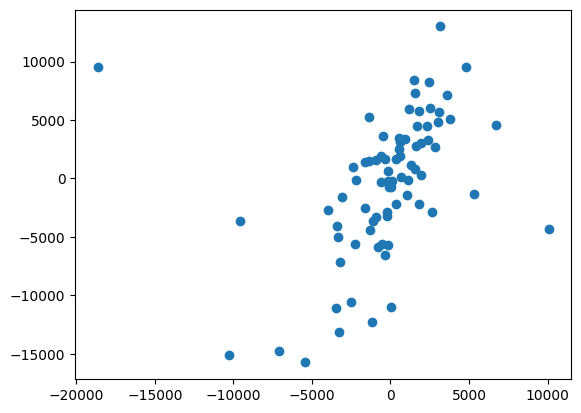

In [19]:
plt.scatter(a[:,2],a[:,1]-a[:,0])

In [ ]:
ResponseFunctionVolume(data[0].values, data[1].values, data[2].values, data[5].values, data[3].values, dt = 300, start=34200 , end= 57600)

In [26]:
Result = []
for i,z in zip(TSLA_order,TSLA_LOB):
    data = pd.read_csv(i,header=None)[[0,1,3,5]]
    lob = pd.read_csv(z,header=None)[[0,2]]
    data[2] = (lob[0]+lob[2])/2
    a= ResponseFunctionVolume(data[0].values, data[1].values, data[2].values, data[5].values, data[3].values, step = 300, start=34200 , end= 57600)
    Result.extend(a.tolist().copy())
    pass


In [27]:
Result = pd.DataFrame(Result)

In [110]:
def binning(x,y,nbin=10,eq = True,step = 0.01):
    step = (0.04)/(nbin)
    X = []
    Y = []
    Yerr = []
    tmpY = []
    start = np.min(x)+step
    if eq:
        for i in range(len(x)):
            while x[i] > start:
                print(len(tmpY))
                X.append(start-step/2)
                Y.append(np.mean(tmpY))
                #Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpY=[]
                pass
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            print(len(tmpY))
            X.append(start-step/2)
            Y.append(np.mean(tmpY))
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X,Y,Yerr
        pass
    else:
        tmpX = []
        Xerr = []
        for i in range(len(x)):
            while x[i] > start:
                X.append(np.mean(tmpX))
                Y.append(np.mean(tmpY))
                Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpX=[]
                tmpY=[]
                pass
            tmpX.append(x[i])
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(np.mean(tmpX))
            Y.append(np.mean(tmpY))
            Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X, Y, Yerr

In [111]:
a = pd.DataFrame([Result[2].values, (Result[1]-Result[0]).values]).T.sort_values(0).values
x,y,yerr = binning(a[:,0],a[:,1],30)


1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
2
1
1
0
0
3
1
1
4
8
10
9
12
10
17
16
27
41
73
147
189
292
249
153
95
61
31
30
14
14
10
9
8
2
2
2
1
3
2
1
2
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1


/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',


In [112]:
x

[-0.05891002256127873,
 -0.0575766892279454,
 -0.05624335589461207,
 -0.054910022561278735,
 -0.0535766892279454,
 -0.05224335589461207,
 -0.05091002256127874,
 -0.049576689227945406,
 -0.048243355894612074,
 -0.04691002256127874,
 -0.04557668922794541,
 -0.04424335589461208,
 -0.042910022561278745,
 -0.04157668922794541,
 -0.04024335589461208,
 -0.03891002256127875,
 -0.037576689227945416,
 -0.036243355894612084,
 -0.03491002256127875,
 -0.03357668922794542,
 -0.03224335589461209,
 -0.03091002256127875,
 -0.02957668922794542,
 -0.028243355894612087,
 -0.026910022561278755,
 -0.025576689227945423,
 -0.02424335589461209,
 -0.022910022561278758,
 -0.021576689227945426,
 -0.020243355894612094,
 -0.01891002256127876,
 -0.01757668922794543,
 -0.016243355894612097,
 -0.014910022561278762,
 -0.013576689227945428,
 -0.012243355894612094,
 -0.01091002256127876,
 -0.009576689227945426,
 -0.008243355894612094,
 -0.0069100225612787605,
 -0.005576689227945427,
 -0.004243355894612094,
 -0.0029100225

In [113]:
Result.shape

(1560, 4)

<AxesSubplot: xlabel='2', ylabel='Count'>

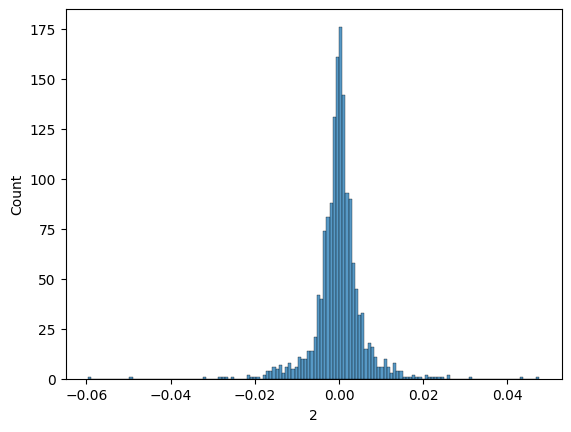

In [114]:
sns.histplot(Result[2])

<ErrorbarContainer object of 3 artists>

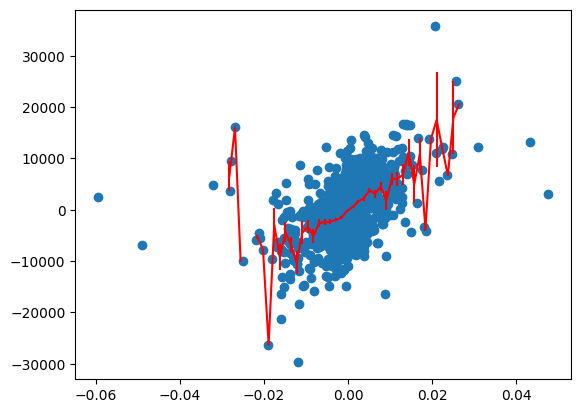

In [117]:
plt.scatter(Result[2],Result[1]-Result[0])
plt.errorbar(x,y,yerr =yerr,color="red")

In [160]:
use = [(not i) for i in  np.isnan(y)]
use = np.array(use)#.astype(int)
x = np.array(x)
y = np.array(y)

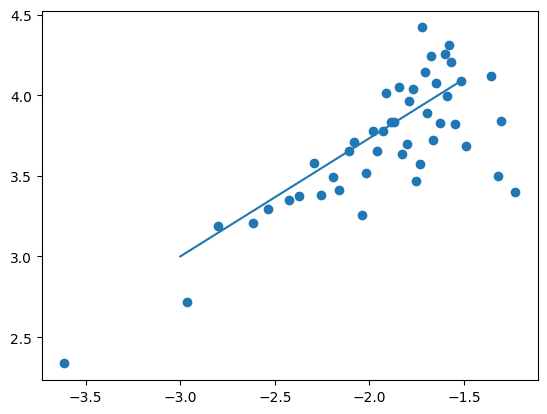

In [167]:
plt.scatter(np.log10( np.abs(x[use])),np.log10( np.abs(y[use])))
plt.plot([-3.0,-1.5],[3,4.1])


In [169]:
from scipy import stats
a = np.argsort(np.abs(x[use]))

stats.linregress(np.log10(np.abs(x[use])[a][2:] ),np.log10( np.abs(y[use])[a][2:] ))

LinregressResult(slope=0.5593568392798882, intercept=4.796170470834358, rvalue=0.6157944422240712, pvalue=8.616108301200798e-06, stderr=0.11043415663990143, intercept_stderr=0.20896059974489015)

In [155]:
np.isnan(y).astype()

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False])